In [17]:
# Imports

from functions import *

from constants import *

from matplotlib import pyplot as plt

from skimage.metrics import *

inputFileName = "encryptedImage0.png"
outputFileName1 = "encryptedImage1.jpg"

# outputFileName2 = "encryptedImage2.jpg"
# outputFileName3 = "encryptedImage3.jpg"


In [18]:
import os

os.listdir("./images/")

['encryptedImage0.png', 'encryptedImage1.jpg', 'decryptedImage1.jpg']

# Encryption and Decryption

In [19]:
originalImage = load_image(basePath+inputFileName)

password, encryptedImage = encryptImage(basePath+inputFileName ,outputFileName1)

#  for decryption
inputFileName = "encryptedImage1.jpg"
outputFileName1 = "decryptedImage1.jpg"

decryptedImage = decryptImageFromArray(encryptedImage ,outputFileName1, password)



NameError: name 'imgS' is not defined

## =================================================================================================
#                                            METRICS
## =================================================================================================

# MSE 

Mean Squared Error (MSE) is a commonly used metric in image processing to measure the difference between two images. It quantifies the average squared difference between the pixel values of the original image and the reconstructed (or processed) image. The MSE is calculated using the following formula: 

MSE = (1 / (m * n)) * Σ(Σ((I(x, y) - R(x, y))^2)) 

where: 

* I(x, y) represents the pixel value at location (x, y) in the original image. 

* R(x, y) represents the pixel value at location (x, y) in the reconstructed image. 

* m and n are the dimensions of the images (height and width). 

* Σ denotes the summation over all pixels. 

The MSE calculates the average squared difference between corresponding pixels in the two images. It provides a measure of the overall "error" or difference between the images. A lower MSE value indicates a smaller difference between the images and implies a better reconstruction or similarity. 

In [ ]:
# =================================== MSE ===================================================



# MSE between originalImage, encryptedImage
score= mean_squared_error(originalImage, encryptedImage)
print("\n\nMSE between original and encrypted=", score)

# MSE between originalImage, decryptedImage
score= mean_squared_error(originalImage, decryptedImage)
print("MSE between original and decrypted=", score)

# SSIM
The SSIM metric compares three key aspects of images: luminance, contrast, and structure. It considers the luminance similarity, contrast similarity, and structural similarity between the two images being compared. The SSIM index ranges from 0 to 1, with a value closer to 1 indicating a higher similarity between the images. 

SSIM(x, y) = [l(x, y) * c(x, y) * s(x, y)]^(α * β * γ) 

where: 

* x and y are the input images being compared. 

* l(x, y) represents the luminance similarity between x and y. 

* c(x, y) represents the contrast similarity between x and y. 

* s(x, y) represents the structural similarity between x and y. 

* α, β, and γ are parameters that control the relative importance of the three components. 

The luminance similarity (l(x, y)) is calculated as the mean of the luminance comparison between x and y. It measures the similarity in the overall brightness or intensity of the images. 

The contrast similarity (c(x, y)) is calculated as the standard deviation of the luminance comparison between x and y. It captures the similarity in the contrast or variation of intensities in the images. 

The structural similarity (s(x, y)) is calculated as the covariance of the luminance comparison and the product of the standard deviations of the luminance in x and y. It measures the similarity in the structural patterns or textures present in the images. 

The parameters α, β, and γ are used to adjust the relative importance of the luminance, contrast, and structural components, respectively. The typical values for these parameters are α = β = γ = 1. 

In [ ]:



# ======================== SSIM (Structural Similarity Index) ===============================

# SSIM between originalImage, encryptedImage
(score, diff) = structural_similarity(originalImage, encryptedImage, full=True, data_range = 255)
print("\n\nImage similarity between original and encrypted=", score)

# Compute SSIM between originalImage, decryptedImage
(score, diff) = structural_similarity(originalImage, decryptedImage, full=True, data_range=255)
print("Image similarity between original and decrypted=", score)


# PSNR 

PSNR stands for Peak Signal-to-Noise Ratio, and it is a metric commonly used in image and video processing to measure the quality or fidelity of a reconstructed or compressed image/video compared to the original. 

PSNR is calculated based on the Mean Squared Error (MSE) between the original and reconstructed images. The formula for calculating PSNR is as follows: 

PSNR = 10 * log10((MAX^2) / MSE) 

where: 

* MAX represents the maximum possible pixel value of the image (e.g., 255 for 8-bit grayscale or 255 for each RGB channel in a color image). 

* MSE is the Mean Squared Error between the original and reconstructed images, calculated as the average squared difference between corresponding pixels. 

In [ ]:
# ======================== PSNR ===============================

# PSNR between originalImage, encryptedImage
score= peak_signal_noise_ratio(originalImage, encryptedImage, data_range = 255)
print("\n\nPSNR between original and encrypted=", score)

# PSNR between originalImage, decryptedImage
score = peak_signal_noise_ratio(originalImage, decryptedImage, data_range=255)
print("PSNR between original and decrypted=", score)


# Histogram

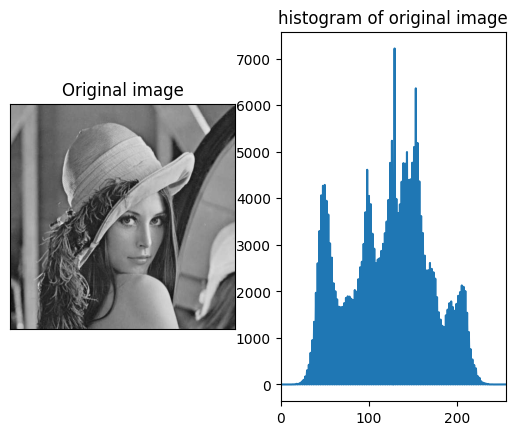

In [ ]:
"""
=============================================================================================
                                        HISTOGRAM OF ORIGINAL IMAGE
=============================================================================================
"""
                                        
plt.subplot(1,2,1)
plt.imshow(originalImage,cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(originalImage.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of original image')

plt.show()

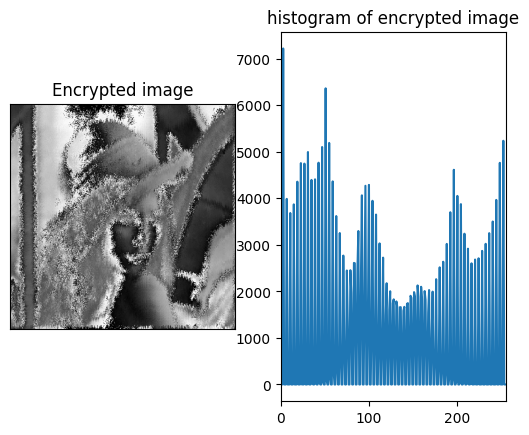

In [ ]:
"""
=============================================================================================
                                        HISTOGRAM OF ENCRYPTED IMAGE
=============================================================================================
"""
                                        
plt.subplot(1,2,1)
plt.imshow(encryptedImage,cmap='gray')
plt.title('Encrypted image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(encryptedImage.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of encrypted image')

plt.show()

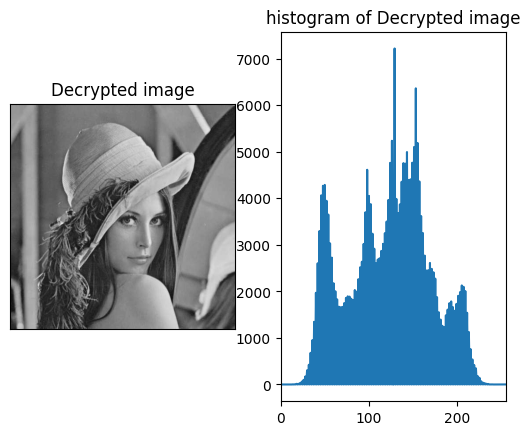

Bad pipe message: %s [b"/\x93\xaez\xee\xdb\xf8\xa5S\xa1\xa2\xbdRw\xa1\x97<\xe0 \x7f\x7f\xf7\xd5\x81\xb1'\xa5\xa6\x99\x1f\xbd\x0f\xe1\xe7^\x8c4\xf2L\x93K)\xf4\x12sB;R[\x1c\xd1\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08"]
Bad pipe message: %s [b'\x08\n\x08\x0b\x08\x04\x08', b'\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\xd9\xe32\xd7\x9e.\xd2\x81\x82V\x9f\x92\x17\x94\xe5\xb5 \n !.^\xd4\x1f\x07\x9b\x83\x0bm\x9f")\xaa\xcc`\xa6\x85\xc2/\xd0~\xe4\xf4\xfa\x9d\xae\xdf\x16g\x8fB\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 ?\x10\xfea\xb8Dm\xf7\x8c\xc5F\xcc

In [ ]:
"""
=============================================================================================
                                        HISTOGRAM OF DECRYPTED IMAGE
=============================================================================================
"""
                                        
plt.subplot(1,2,1)
plt.imshow(decryptedImage,cmap='gray')
plt.title('Decrypted image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(decryptedImage.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of Decrypted image')

plt.show()